In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import datetime as dt
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from auto_ts import auto_timeseries as ATS
plt.style.use('fivethirtyeight')

Imported auto_timeseries version:0.0.90. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [2]:
ruta_archivo = '/Users/macronald/U Central/Tesis Maestria Calidad/Insumos/df_TS.csv'
df = pd.read_csv(ruta_archivo)
df_check = df

In [3]:
train_df = df_check.iloc[:int(len(df_check) * 0.9)]
test_df = df_check.iloc[int(len(df_check) * 0.9):]
print(train_df.shape, test_df.shape)
test_df

(572162, 3) (63574, 3)


,DateTime,Estacion,ICA
572162,2023-09-19 17:00:00,MinAmbiente,32.0
572163,2023-09-19 17:00:00,MovilFontibon,92.0
572164,2023-09-19 17:00:00,MovilSeptima,44.0
572165,2023-09-19 17:00:00,PuenteAranda,28.0
572166,2023-09-19 17:00:00,SanCristobal,26.0
...,...,...,...
635731,2024-02-06 22:00:00,CarvajalSevillana,108.0
635732,2024-02-06 23:00:00,Bolivia,52.0
635733,2024-02-06 23:00:00,CarvajalSevillana,91.0
635734,2024-02-06 23:59:00,Bolivia,52.0


In [4]:
#test_df['DateTime'] = pd.to_datetime(test_df['DateTime'], format='%Y-%m-%d %H:%M:%S')
#train_df['DateTime'] = pd.to_datetime(train_df['DateTime'], format='%Y-%m-%d %H:%M:%S')
test_df['DateTime'] = pd.to_datetime(test_df['DateTime'])
train_df['DateTime'] = pd.to_datetime(train_df['DateTime'])

In [5]:
station_test = test_df.Estacion.unique()
station_test

array(['MinAmbiente', 'MovilFontibon', 'MovilSeptima', 'PuenteAranda',
       'SanCristobal', 'Suba', 'Tunal', 'Usaquen', 'Usme',
       'AltoRendimiento', 'Bolivia', 'CarvajalSevillana', 'CiudadBolivar',
       'Colina', 'Fontibon', 'Guaymaral', 'Jazmin', 'Kennedy',
       'LasFerias'], dtype=object)

In [6]:
train_df = train_df[train_df.Estacion == station_test[6]]
test_df = test_df[test_df.Estacion == station_test[6]]
test_df = test_df.drop('Estacion', axis=1)
train_df = train_df.drop('Estacion', axis=1)
test_df = test_df.set_index('DateTime')
train_df = train_df.set_index('DateTime')

In [7]:
test_df

,ICA
DateTime,
2023-09-19 17:00:00,42.0
2023-09-19 18:00:00,64.0
2023-09-19 19:00:00,39.0
2023-09-19 20:00:00,49.0
2023-09-19 21:00:00,45.0
...,...
2024-02-05 20:00:00,64.0
2024-02-05 21:00:00,56.0
2024-02-05 22:00:00,78.0


In [8]:
import copy
subm = copy.deepcopy(test_df)

In [9]:
ts_column = 'DateTime'
orig_target = 'ICA'

In [10]:
score_type = 'rmse'
forecast_period = test_df.shape[0]
timeinterval = 'H'
non_seasonal_pdq = (2, 1, 2)
seasonality = True
seasonal_periods = 24
sep = ','

In [11]:
automl_model = ATS(
            score_type=score_type, time_interval=timeinterval,
            non_seasonal_pdq=None, seasonality=True, seasonal_period=24,
            model_type='ML', forecast_period=500,
            strf_time_format='%Y-%m-%d %H:%M:%S',  # Formato de fecha y hora
            verbose=2)

Start of Fit.....
    Target variable given as = ICA
Start of loading of data.....
    Inputs: ts_column = DateTime, sep = ,, target = ['ICA']
    Using given input: pandas dataframe...
    train time series DateTime column is the index on test data...
    train data shape = (32584, 1)
Alert: Could not detect strf_time_format of DateTime. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |     -15.318746932573006      |
|           p-value           |    4.091552471525276e-28     |
|          #Lags Used         |             26.0             |
| Number of Observations Used |           32557.0            |
|     Critical Value 

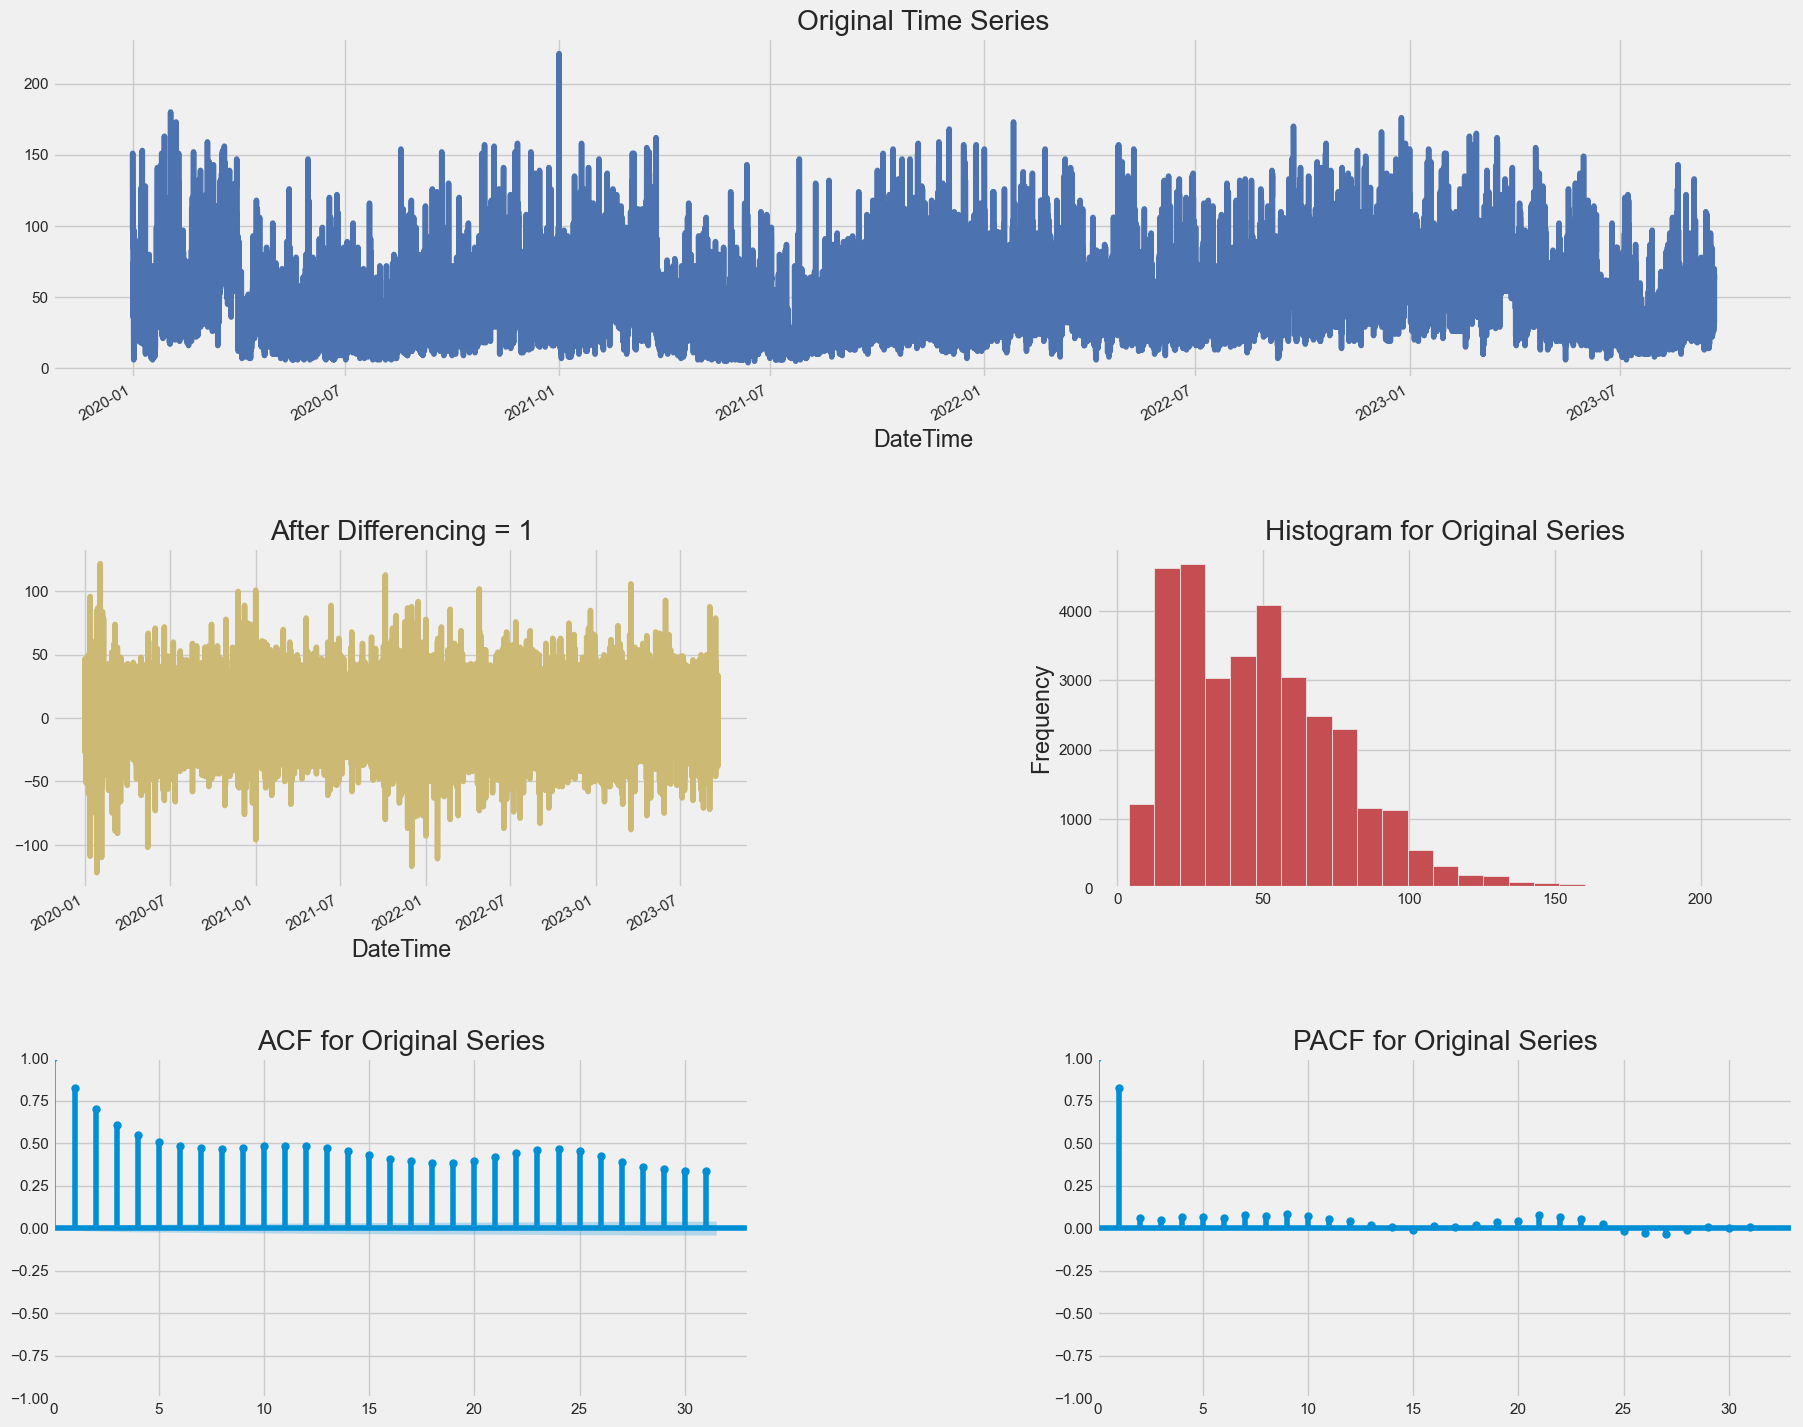

Time Interval is given as H
    Correct Time interval given as a valid Pandas date-range frequency...


Building ML Model



Creating 2 lagged variables for Machine Learning model...
    You have set lag = 3 in auto_timeseries setup to feed prior targets. You cannot set lags > 10 ...
### Be careful setting dask_xgboost_flag to True since dask is unstable and doesn't work sometime's ###

########### Single-Label Regression Model Tuning and Training Started ####
    Error in creating date time derived features. Continuing...

Fitting ML model
    9 variables used in training ML model = ['ICA(t-1)', 'DateTime_hour', 'DateTime_minute', 'DateTime_dayofweek', 'DateTime_quarter', 'DateTime_month', 'DateTime_year', 'DateTime_dayofyear', 'DateTime_dayofmonth']

Running Cross Validation using XGBoost model..
    Max. iterations using expanding window cross validation = 2
train fold shape (29324, 9), test fold shape = (3259, 9)
### Number of booster rounds = 250 for XGBoost which can be set durin

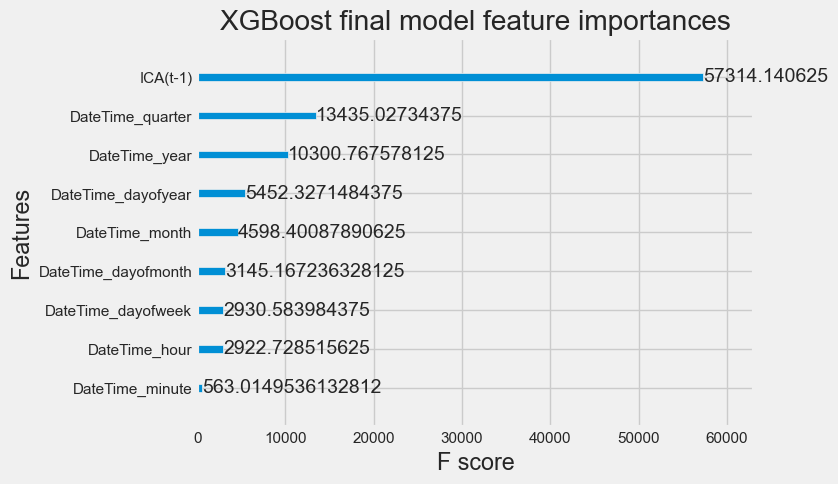

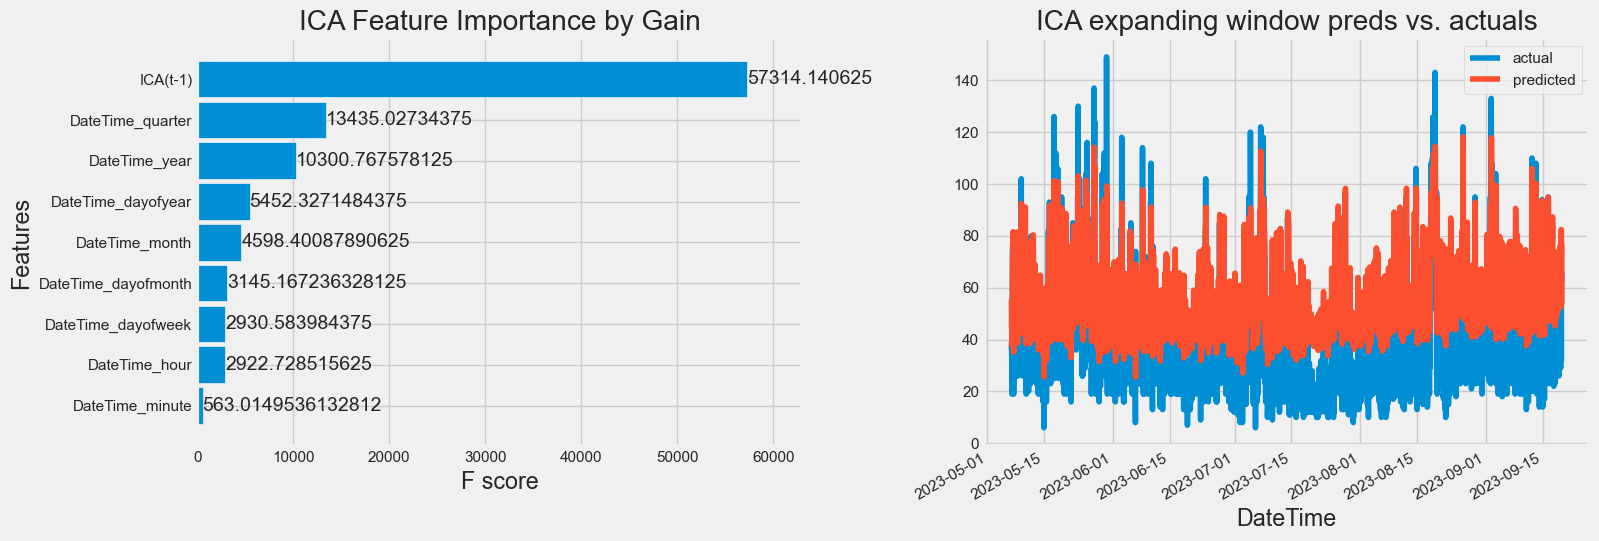

In [12]:
automl_model.fit(train_df, ts_column, orig_target)

In [13]:
predictions  = automl_model.predict(test_df, model='best')
predictions.head()

Predicting using test dataframe shape = (3344, 1) for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    Using given input: pandas dataframe...
    Alert: No strf_time_format given for DateTime. Provide strf_time format during "setup" for better results.
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived 

,yhat,mean_se,mean_ci_lower,mean_ci_upper
DateTime,,,,
2023-09-19 17:00:00,66.505737,NaN,NaN,NaN
2023-09-19 18:00:00,68.497421,NaN,NaN,NaN
2023-09-19 19:00:00,70.869942,NaN,NaN,NaN
2023-09-19 20:00:00,72.166290,NaN,NaN,NaN
2023-09-19 21:00:00,71.579491,NaN,NaN,NaN


In [14]:
predictions

,yhat,mean_se,mean_ci_lower,mean_ci_upper
DateTime,,,,
2023-09-19 17:00:00,66.505737,NaN,NaN,NaN
2023-09-19 18:00:00,68.497421,NaN,NaN,NaN
2023-09-19 19:00:00,70.869942,NaN,NaN,NaN
2023-09-19 20:00:00,72.166290,NaN,NaN,NaN
2023-09-19 21:00:00,71.579491,NaN,NaN,NaN
...,...,...,...,...
2024-02-05 20:00:00,68.489525,NaN,NaN,NaN
2024-02-05 21:00:00,67.881088,NaN,NaN,NaN
2024-02-05 22:00:00,67.355423,NaN,NaN,NaN


,ICA,yhat
DateTime,,
2023-09-19 17:00:00,42.0,66.505737
2023-09-19 18:00:00,64.0,68.497421
2023-09-19 19:00:00,39.0,70.869942
2023-09-19 20:00:00,49.0,72.166290
2023-09-19 21:00:00,45.0,71.579491
...,...,...
2024-02-05 20:00:00,64.0,68.489525
2024-02-05 21:00:00,56.0,67.881088
2024-02-05 22:00:00,78.0,67.355423


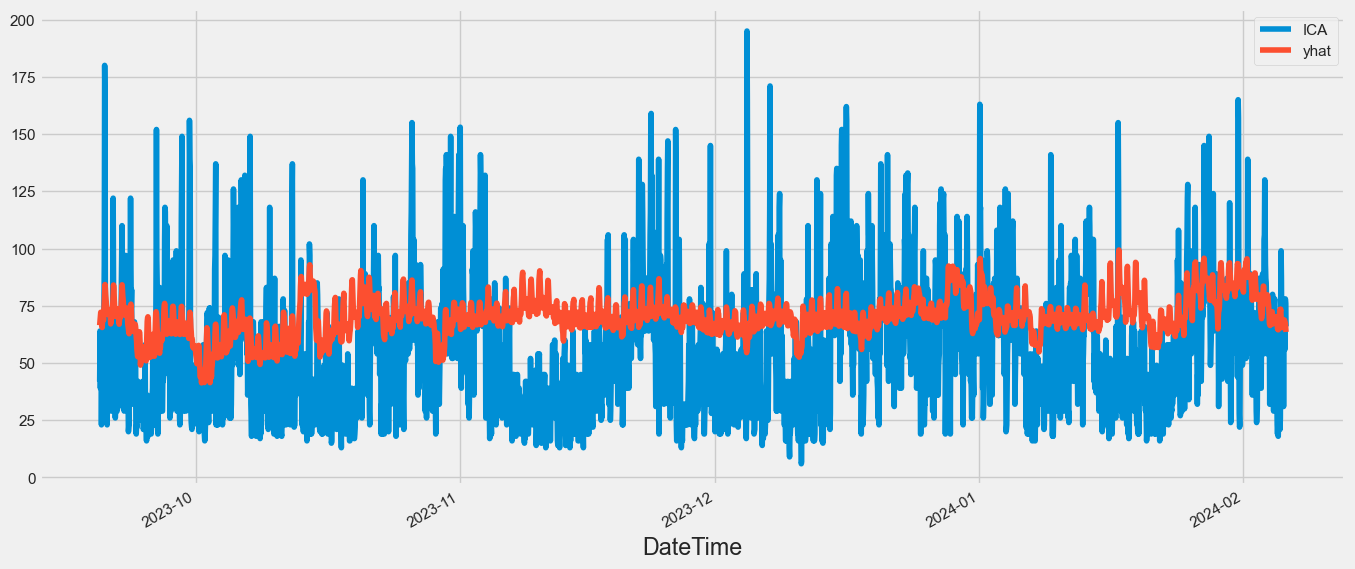

In [16]:
tes_pred = test_df[[orig_target]]
tes_pred['yhat'] = predictions['yhat'].values
pd.concat([tes_pred[orig_target], tes_pred['yhat']],axis=1).plot(figsize=(15,7))
tes_pred


-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 25.73
    MSE (Mean Squared Error = 947.88
    MAPE (Mean Absolute Percent Error) = 74%
    RMSE (Root Mean Squared Error) = 30.7877
    Normalized RMSE (MinMax) = 16%
    Normalized RMSE (as Std Dev of Actuals)= 111%


(30.787729492380823, 110.55678485622214)

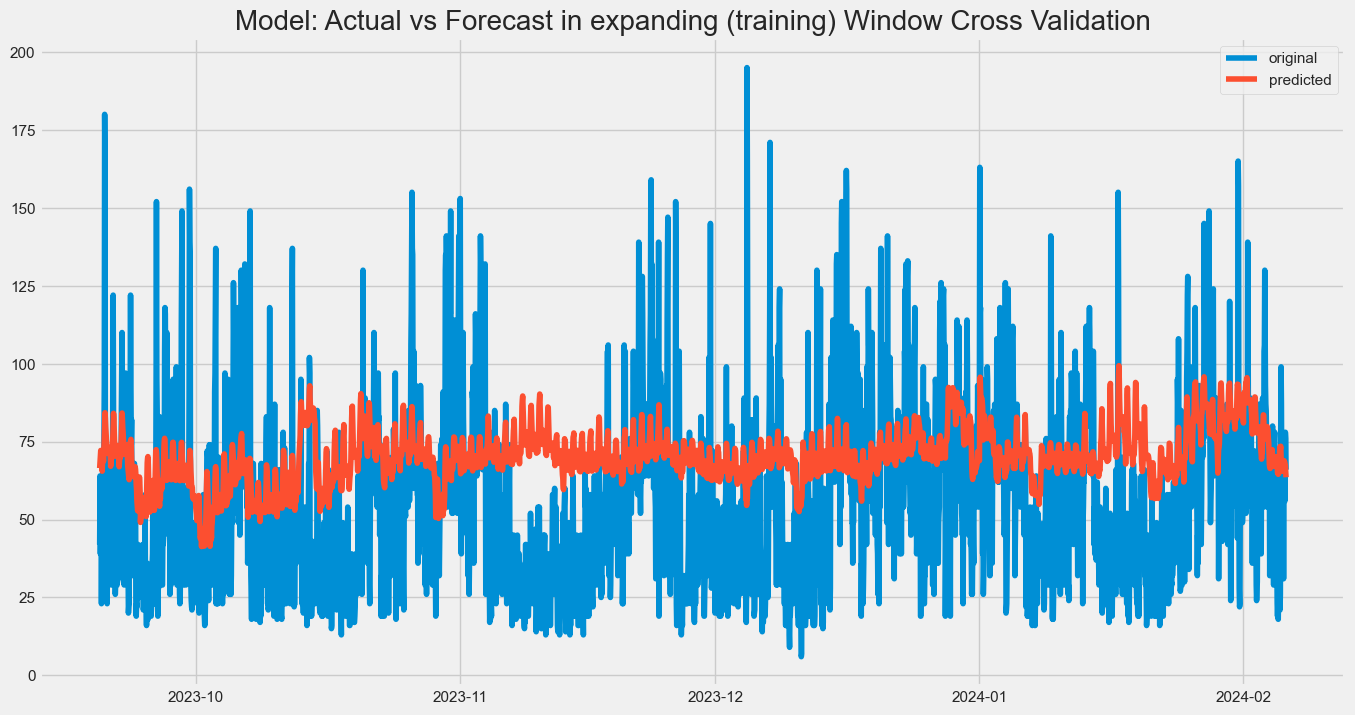

In [17]:
from auto_ts import print_ts_model_stats
print_ts_model_stats(tes_pred[orig_target], tes_pred['yhat'])